### 导论Homework10
#### 10235501435张凯诚

##### 机器学习
数据建模在机器学习中具有极其重要的地位。它是机器学习的核心组成部分，对于训练和评估模型、做出预测和优化决策都至关重要。   
模型训练和学习：在机器学习中，模型通过从数据中学习模式和关系来进行训练。模型的性能和准确性取决于所用数据的质量和数量。良好的数据建模可以提供高质量的训练数据，有助于构建更准确和可靠的模型   

##### 题目一、以鸢尾花数据集为例学习 SVM
1.加载数据，划分鸢尾花数据集，训练集比例0.2，随机种子42     
2.创建并训练 SVM 模型，使用线性核函数，随机种子42     
3.使用 Accuracy、Recall、F1 Score、Confusion Matri 这四个评估指标来评估实验效果     

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
import numpy as np

# 设置随机种子，确保结果可复现
np.random.seed(42)

# 1. 加载数据，划分鸢尾花数据集，训练集比例0.2，随机种子42
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. 创建并训练SVM模型，使用线性核函数，随机种子42
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# 3. 使用Accuracy、Recall、F1 Score、Confusion Matrix这四个评估指标来评估实验效果
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


##### 题目二、以新闻数据分类为例 学习朴素贝叶斯
1.导入库与数据集，数据集的导入方式：from sklearn.datasets import fetch_20newsgroups     
2.查看类别标签、数据集的描述、数据样本   
3.将文本数据转换为词袋模型    
4.将数据集分为训练集和测试集，训练集比例0.2，随机种子42   
5.创建并训练朴素贝叶斯分类器   
6.使用 Accuracy、Recall、F1 Score 这三个评估指标来评估实验效果    
7.横坐标为 Predicted，纵坐标为 Actual，画出混淆矩阵Confusion Matrix    

类别标签: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
数据集描述: .. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.fea

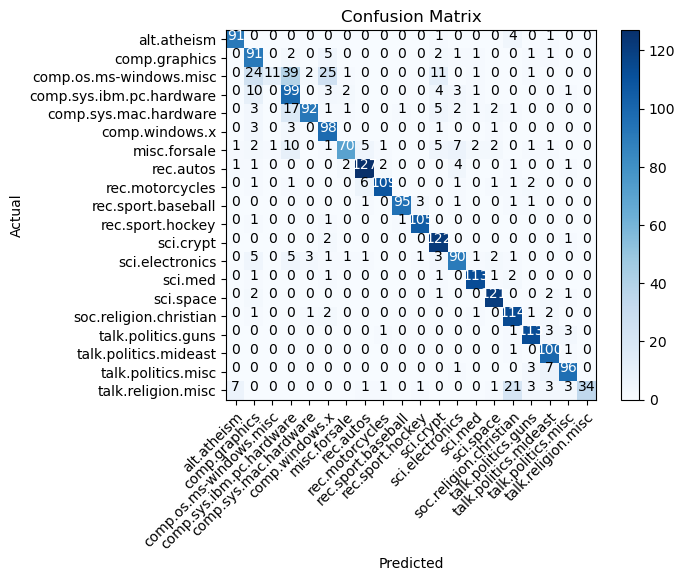

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix


# 导入数据集
news_data = fetch_20newsgroups()

# 2.查看类别标签，数据集的描述，数据样本
print("类别标签:", news_data.target_names)
print("数据集描述:", news_data.DESCR)
print("数据样本示例:")
print(news_data.data[0])

# 3.将文本数据转换为词袋模型
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(news_data.data)

# 4.将数据集分为训练集和测试集，训练集比例0.2，随机种子42
X_train, X_test, y_train, y_test = train_test_split(X, news_data.target, test_size=0.2, random_state=42)

# 5.创建并训练朴素贝叶斯分类器
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = nb_classifier.predict(X_test)

# 6.使用Accuracy、Recall、F1 Score这三个评估指标来评估实验效果
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)

# 7.画出混淆矩阵Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(news_data.target_names))
plt.yticks(tick_marks, news_data.target_names)
plt.xticks(tick_marks, news_data.target_names, rotation=45, ha='right', rotation_mode='anchor')
plt.gca().set_xticklabels(news_data.target_names, rotation=45, ha='right', rotation_mode='anchor',
                          minor=False, linespacing=1.5)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, conf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

##### 题目三、以鸢尾花数据集为例 学习k-means聚类
1.导入数据集和聚类库   
2.使用k-means聚类，将数据分为3个簇，设置随机种子为0   
3.PCA 降维到2维空间后，输出可视化结果  
4.尝试先降维，再聚类，再输出可视化结果，比较两次的不同  
5.使用轮廓系数比较聚类效果  
6.绘制轮廓系数与聚类数的关系图    

d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


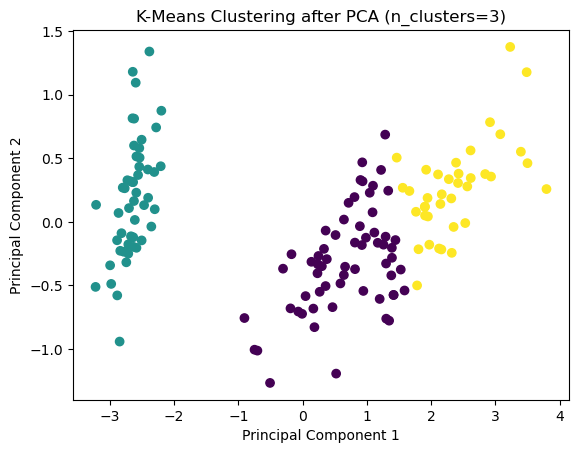

d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


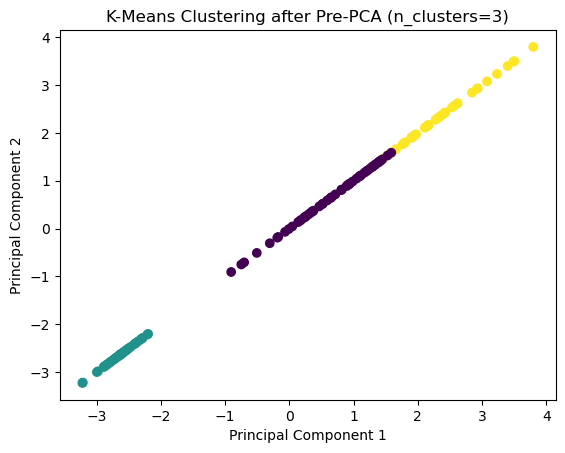

Silhouette Score for K-Means Clustering after PCA: 0.5528190123564095
Silhouette Score for K-Means Clustering after Pre-PCA: 0.5976764219547991


d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avo

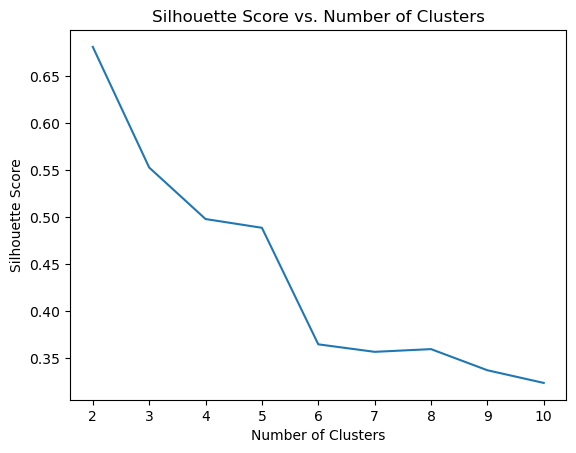

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


# 1. 导入数据集和聚类库
iris = load_iris()
X = iris.data
y = iris.target

# 2. 使用k-means聚类，将数据分为3个簇，设置随机种子为0
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
labels_kmeans = kmeans.labels_

# 3. PCA降维到2维空间后，输出可视化结果
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans)
plt.title("K-Means Clustering after PCA (n_clusters=3)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# 4. 尝试先降维，再聚类，再输出可视化结果
X_pca_again = PCA(n_components=2).fit_transform(X)
kmeans_again = KMeans(n_clusters=3, random_state=0)
kmeans_again.fit(X_pca_again)
labels_kmeans_again = kmeans_again.labels_

plt.scatter(X_pca_again[:, 0], X_pca_again[:, 0], c=labels_kmeans_again)
plt.title("K-Means Clustering after Pre-PCA (n_clusters=3)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# 5. 使用轮廓系数比较聚类效果
silhouette_kmeans = silhouette_score(X, labels_kmeans)
silhouette_kmeans_again = silhouette_score(X_pca_again, labels_kmeans_again)

print("Silhouette Score for K-Means Clustering after PCA:", silhouette_kmeans)
print("Silhouette Score for K-Means Clustering after Pre-PCA:", silhouette_kmeans_again)

# 6. 绘制轮廓系数与聚类数的关系图
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans_loop = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans_loop.fit(X)
    labels_loop = kmeans_loop.labels_
    silhouette_scores.append(silhouette_score(X, labels_loop))

plt.plot(range(2, 11), silhouette_scores)
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()